# Template Matching

Template matching is the process of moving the template over the entire image and calculating the similarity between the template and the covered window on the image. 

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be

### Full Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

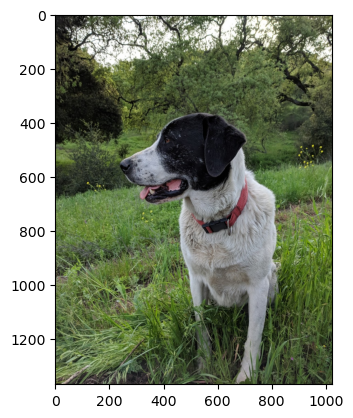

In [3]:
plt.imshow(full)

### Template Image

A subset of the image. Note how its actually the exact image.

In [4]:
face= cv2.imread('dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

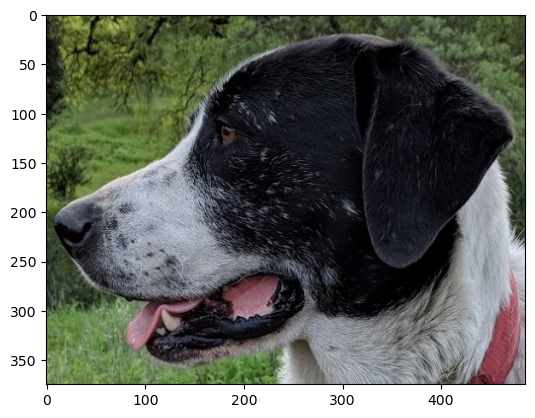

In [5]:
plt.imshow(face)

**Quick Note on **eval()** function in case you haven't seen it before!**

In [6]:
sum([1,2,3])

6

In [7]:
mystring = 'sum'

In [8]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [9]:
myfunc = eval(mystring)

In [10]:
myfunc([1,2,3])

6

In [11]:
height, width,channels = face.shape

In [12]:
width

486

In [13]:
height

375

In [14]:
# The Full Image to Search
full = cv2.imread('dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

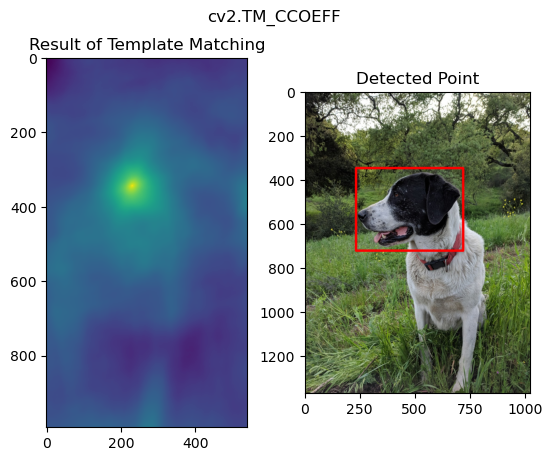

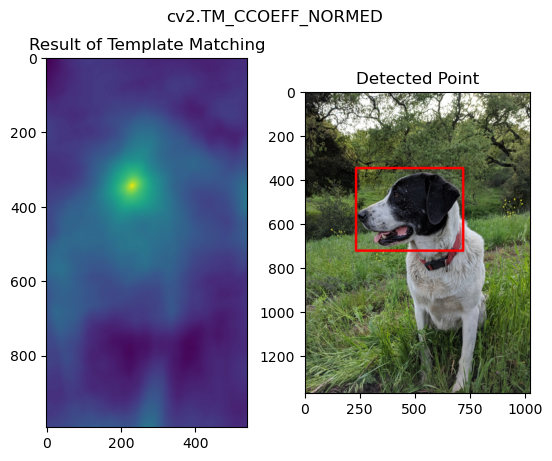

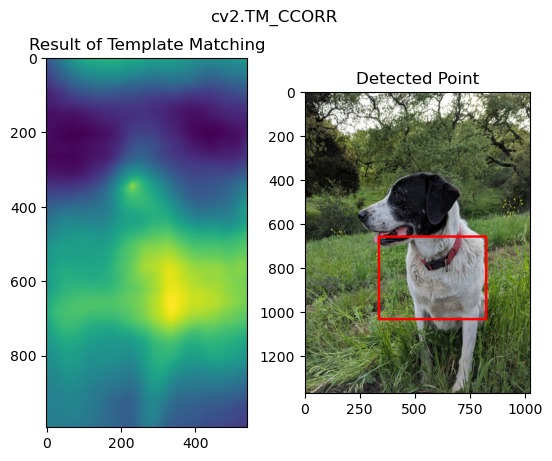

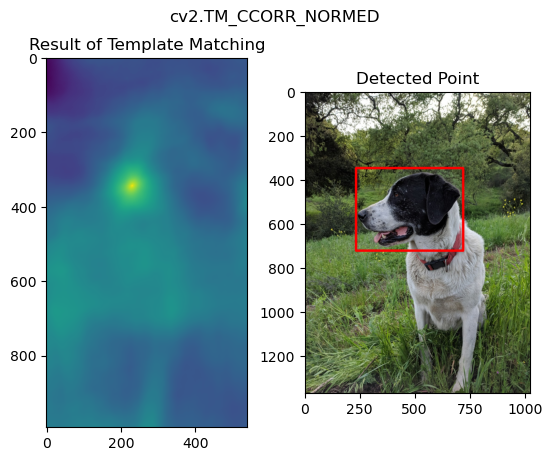

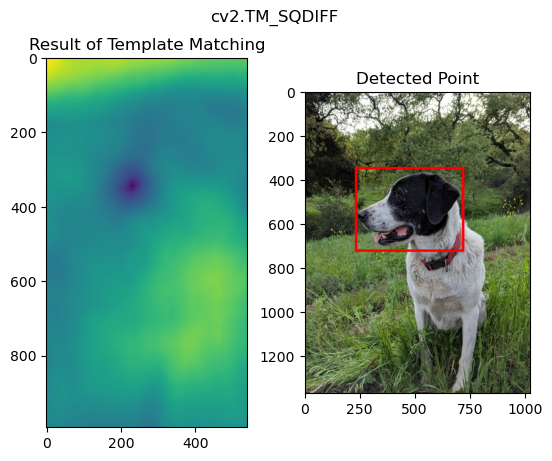

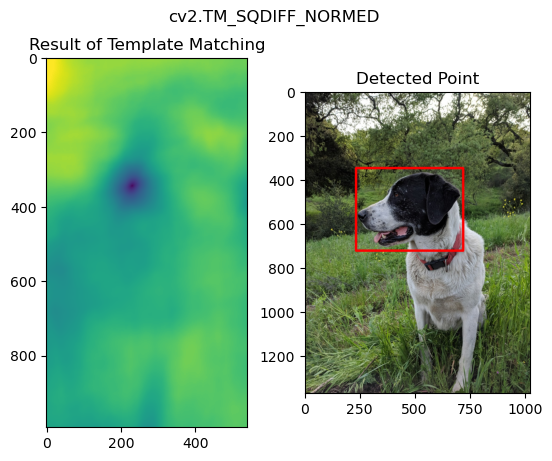

In [15]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

In [16]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [17]:
reeses = cv2.imread('reeses_puffs.png',0)     

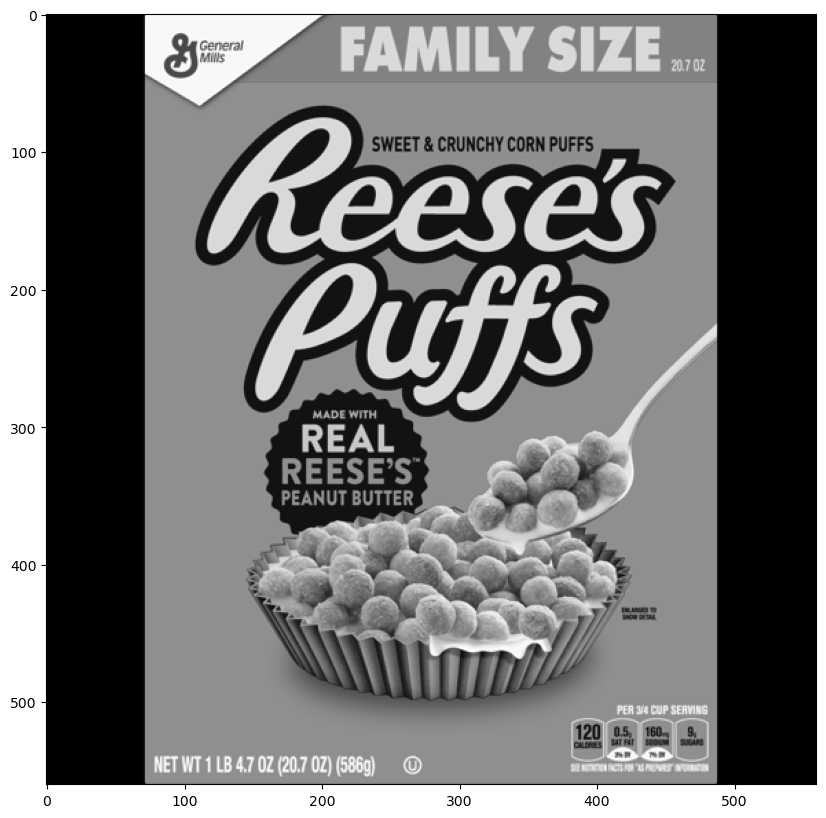

In [18]:
display(reeses)

In [19]:
cereals = cv2.imread('many_cereals.jpg',0) 

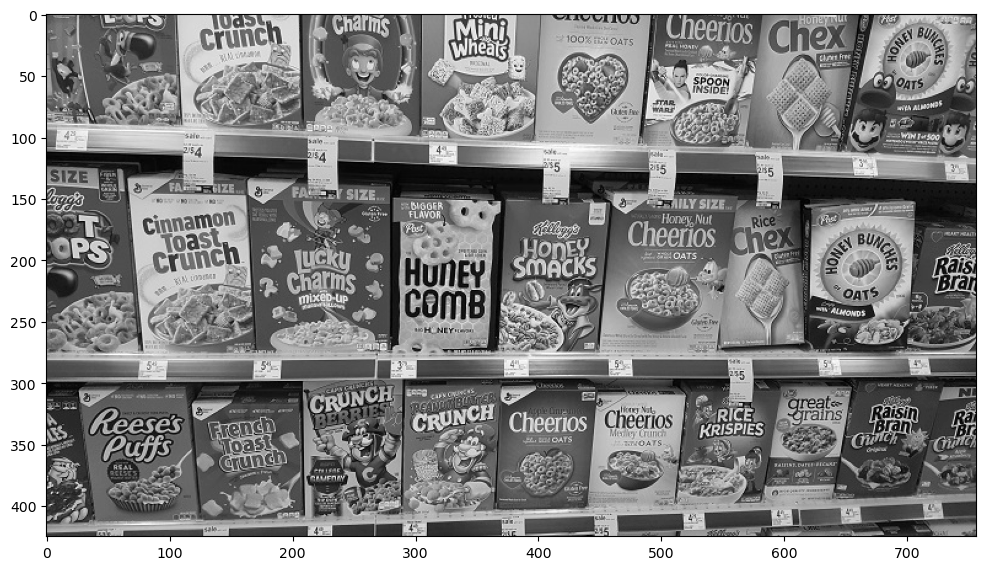

In [20]:
display(cereals)

# Brute Force Detection with ORB Descriptors

In [21]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

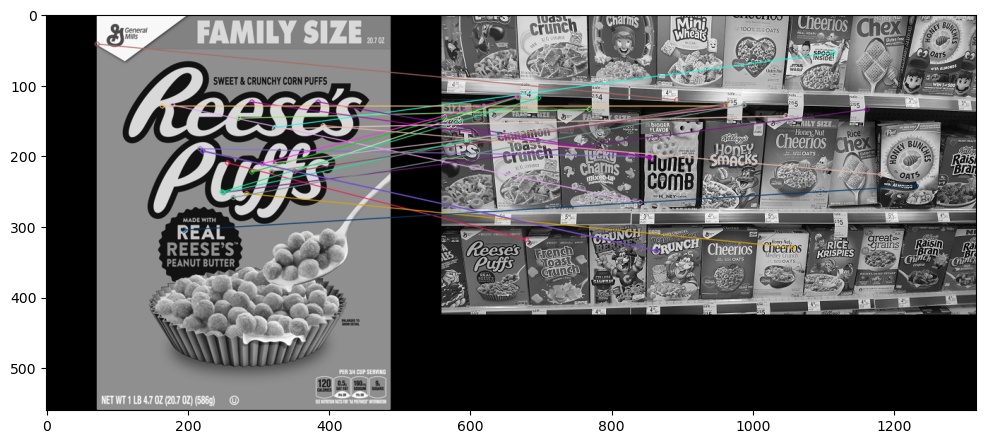

In [22]:
display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test


The scale-invariant feature transform (SIFT) is a computer vision algorithm to detect, describe, and match local features in images, invented by David Lowe in 1999. Applications include object recognition, robotic mapping and navigation, image stitching, 3D modeling, gesture recognition, video tracking, individual identification of wildlife and match moving.

SIFT keypoints of objects are first extracted from a set of reference images and stored in a database. An object is recognized in a new image by individually comparing each feature from the new image to this database and finding candidate matching features based on Euclidean distance of their feature vectors. From the full set of matches, subsets of keypoints that agree on the object and its location, scale, and orientation in the new image are identified to filter out good matches. 


https://towardsdatascience.com/sift-scale-invariant-feature-transform-c7233dc60f37

https://www.educative.io/answers/what-is-sift

https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html

In [24]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [ ]:
#pip install opencv-contrib-python

In [ ]:
display(sift_matches)

# FLANN based Matcher

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

In [ ]:
display(flann_matches)